<a href="https://colab.research.google.com/github/CESARIUX2596/CS-Master/blob/master/Artificial_Vision_Final_Torres_Cesar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Guitar classification
In this project we will create a model that classifies guitar by body type in realtime using the videofeed of a camera.
The body types available to clasify are the following:


*   Acoustic
*   Double Cut
*   Les Paul
*   Telecaster
*   Strat
*   Ukulele




In [ ]:
# Imports
import numpy as np # Operate with image
import pandas as pd # Create dataframe to feed the CNN
import pickle # Store trained model for future uses
import tensorflow as tf # Backbone of AI Architecture
import os
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.layers import Input, Dense, Conv2D, Dropout, Flatten, MaxPooling2D # Inteface to tensorflow
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import cv2 # Manipulate images
from matplotlib import pyplot as plt # Display info related to the model
%matplotlib inline

## Read dataset hosted from Google Drive
Mount google drive as a device to acces the folder that contains the images that will be used to train the Convolutional Neuronal Network to classify guitar images

In [ ]:
# Mount Google drive as a device
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Mount folder where data is hosted
os.chdir("/content/drive/My Drive/datasets/caos_guitar_dataset")
!ls

Acoustic  Double_Cut  Les_Paul	Strat  Telecaster  Ukulele


In [ ]:
print("Amount of pictures per style")
path, dirs, accoustic = next(os.walk("/content/drive/My Drive/datasets/caos_guitar_dataset/Acoustic"))
accoustic_count = len(accoustic)
print("Acoustic:" , accoustic_count)

path, dirs, double_cut = next(os.walk("/content/drive/My Drive/datasets/caos_guitar_dataset/Double_Cut"))
dc_count = len(double_cut)
print("Double Cut:" , dc_count)

path, dirs, les_paul = next(os.walk("/content/drive/My Drive/datasets/caos_guitar_dataset/Les_Paul"))
lp_count = len(les_paul)
print("Les Paul:" , lp_count)

path, dirs, telecaster = next(os.walk("/content/drive/My Drive/datasets/caos_guitar_dataset/Telecaster"))
tele_count = len(telecaster)
print("Telecaster:" , tele_count)

path, dirs, strat = next(os.walk("/content/drive/My Drive/datasets/caos_guitar_dataset/Strat"))
strat_count = len(strat)
print("Strat:" , strat_count)


path, dirs, ukulele = next(os.walk("/content/drive/My Drive/datasets/caos_guitar_dataset/Ukulele"))
ukulele_count = len(ukulele)
print("Ukulele:" , ukulele_count)


Amount of pictures per style
Acoustic: 900
Double Cut: 900
Les Paul: 900
Telecaster: 900
Strat: 900
Ukulele: 900


In [ ]:
# Start creating dataset for each label
X = []
y = []

os.chdir("/content/drive/My Drive/datasets/caos_guitar_dataset/Acoustic")
tmp = os.listdir()
for img_name in tmp:
  img = cv2.imread(img_name, 0)
  img = cv2.resize(img, (128,128))
  img = img/255.0 # Normalize the image for values between 0 and 1
  img = np.asarray(img, dtype=np.float32)
  # X.append(img.flatten().astype('float32'))
  X.append(img)
  y.append('acoustic')
  # y.append(0)
print('Acoustic Finished')

print(len(X))
print(len(y))

os.chdir("/content/drive/My Drive/datasets/caos_guitar_dataset/Double_Cut")
tmp = os.listdir()
for img_name in tmp:
  # print(img_name)
  img = cv2.imread(img_name, 0)
  img = cv2.resize(img, (128,128))
  img = img/255.0 # Normalize the image for values between 0 and 1
  img = np.asarray(img, dtype=np.float32)
  # X.append(img.flatten().astype('float32'))
  X.append(img)
  y.append('double_cut')
  # y.append(1)
print('Double Cut Finished')

print(len(X))
print(len(y))

os.chdir("/content/drive/My Drive/datasets/caos_guitar_dataset/Les_Paul")
tmp = os.listdir()
for img_name in tmp:
  img = cv2.imread(img_name, 0)
  img = cv2.resize(img, (128,128))
  img = img/255.0 # Normalize the image for values between 0 and 1
  img = np.asarray(img, dtype=np.float32)
  # X.append(img.flatten().astype('float32'))
  X.append(img)
  y.append('les_paul')
  # y.append(2)
print('Les Paul Finished')

print(len(X))
print(len(y))

os.chdir("/content/drive/My Drive/datasets/caos_guitar_dataset/Strat")
tmp = os.listdir()
for img_name in tmp:
  img = cv2.imread(img_name, 0)
  img = cv2.resize(img, (128,128))
  img = img/255.0 # Normalize the image for values between 0 and 1
  img = np.asarray(img, dtype=np.float32)
  # X.append(img.flatten().astype('float32'))
  X.append(img)
  y.append('strat')
  # y.append(3)
print('Strat Finished')

print(len(X))
print(len(y))

os.chdir("/content/drive/My Drive/datasets/caos_guitar_dataset/Telecaster")
tmp = os.listdir()
for img_name in tmp:
  img = cv2.imread(img_name, 0)
  img = cv2.resize(img, (128,128))
  img = img/255.0 # Normalize the image for values between 0 and 1
  img = np.asarray(img, dtype=np.float32)
  # X.append(img.flatten().astype('float32'))
  X.append(img)
  y.append('telecaster')
  # y.append(4)
print('Telecaster Finished')

print(len(X))
print(len(y))

os.chdir("/content/drive/My Drive/datasets/caos_guitar_dataset/Ukulele")
tmp = os.listdir()
for img_name in tmp:
  img = cv2.imread(img_name, 0)
  img = cv2.resize(img, (128,128))
  img = img/255.0 # Normalize the image for values between 0 and 1
  img = np.asarray(img, dtype=np.float32)
  # X.append(img.flatten().astype('float32'))
  X.append(img)
  y.append('ukulele')
  # y.append(5)
print('Ukelele finished')

print(len(X))
print(len(y))

print("DONE")

Acoustic Finished
900
900
Double Cut Finished
1800
1800
Les Paul Finished
2700
2700
Strat Finished
3600
3600
Telecaster Finished
4500
4500
Ukelele finished
5400
5400
DONE


In [ ]:
print(f'We got %s featyres and %s labels' % (len(X), len(y)))

We got 5400 featyres and 5400 labels


double_cut
(128, 128)


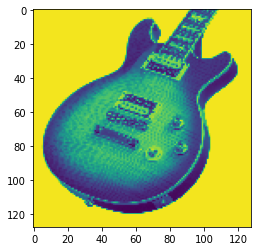

In [ ]:
# Test some images to check if labels correspond to image
# plt.imshow(np.reshape(X[3133]*255,(128,128)) )
plt.imshow(X[1114])
print(y[1114])
print(X[1114].shape)


In [ ]:
data = {'guitar_img':X,'style':y}
# Create dataframe with dictionary
df = pd.DataFrame(data)
print(df.shape)
df.tail()


(5400, 2)


,guitar_img,style
5395,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",ukulele
5396,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",ukulele
5397,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",ukulele
5398,"[[0.88235295, 0.8745098, 0.8784314, 0.85882354...",ukulele
5399,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",ukulele


In [ ]:
# Shuffe Dataframe 
df2 = df.sample(frac=1, random_state=313).reset_index(drop=True)

In [ ]:
df2.tail()

,guitar_img,style
5395,"[[0.6745098, 0.94509804, 0.6392157, 0.5921569,...",les_paul
5396,"[[0.41568628, 0.4, 0.38431373, 0.40784314, 0.4...",ukulele
5397,"[[0.12941177, 0.15686275, 0.1764706, 0.1921568...",ukulele
5398,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",double_cut
5399,"[[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",strat


In [ ]:
# Find Features and targt variables for classification
df2.columns

Index(['guitar_img', 'style'], dtype='object')

In [ ]:
features = df2['guitar_img']
target = df2['style']
print(features.shape)
print(target.shape)

(5400,)
(5400,)


In [114]:
# Split Dataframe into train and test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.15, random_state=133)

In [ ]:

print(f"Length of Training Features %s"%len(X_train))
print(f"Length of Training Labes %s"%len(y_train))
print(f"Length of Testing Features = %s"%len(X_test))
print(f"Length of Testing Labels = %s"%len(y_test))
print(X_train.shape)

Length of Training Features 4590
Length of Training Labes 4590
Length of Testing Features = 810
Length of Testing Labels = 810
(4590,)


In [ ]:
# Perform One Hot Encoding to Separate the categories for the clasification
y_train = pd.get_dummies(y_train, columns=['style'])
y_train.tail()

,acoustic,double_cut,les_paul,strat,telecaster,ukulele
4660,1,0,0,0,0,0
1900,0,0,0,0,0,1
1025,0,0,0,0,0,1
5176,0,0,0,0,0,1
2721,1,0,0,0,0,0


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128,1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

model.compile(loss='CategoricalCrossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [ ]:
# Use the Preprocessing library from keras to perform data augmentation.
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=180, # Give a wide rotation angle for images.
    width_shift_range=0.35, # shift image from side to side
    height_shift_range=0.35, # Shift image vertically
    shear_range=0.35, # Add angle like rotation for the image
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='reflect')

In [ ]:
print(type(X_train))
print(X_train.size)
# print(X_train[0])
# X_train = np.asarray(X_train)
# print(X_train.shape)
# print(type(X_train))
# X_train.reshape(X_train.size,128,128,1)
X_trainn = X_train.to_numpy()

<class 'pandas.core.series.Series'>
4590


In [ ]:
# X_trainn.reshape(-1,128,128,1)

ValueError: ignored

In [ ]:
X_training_deveritas = []

for img in X_train:
  X_training_deveritas.append(img.reshape(128,128,1))

X_training_deveritas = np.asarray(X_training_deveritas)

In [ ]:
print(X_training_deveritas.shape)

(4590, 128, 128, 1)


In [ ]:
model.fit(X_training_deveritas,y_train,batch_size=50,epochs=30)

Epoch 1/30
92/92 [==============================] - 3s 26ms/step - loss: 1.7851 - accuracy: 0.1942
Epoch 2/30
92/92 [==============================] - 2s 25ms/step - loss: 1.6888 - accuracy: 0.2852
Epoch 3/30
92/92 [==============================] - 2s 26ms/step - loss: 1.6138 - accuracy: 0.3280
Epoch 4/30
92/92 [==============================] - 2s 26ms/step - loss: 1.5113 - accuracy: 0.4029
Epoch 5/30
92/92 [==============================] - 2s 26ms/step - loss: 1.4478 - accuracy: 0.4294
Epoch 6/30
92/92 [==============================] - 2s 26ms/step - loss: 1.3486 - accuracy: 0.4820
Epoch 7/30
92/92 [==============================] - 2s 26ms/step - loss: 1.2727 - accuracy: 0.5233
Epoch 8/30
92/92 [==============================] - 2s 26ms/step - loss: 1.1929 - accuracy: 0.5671
Epoch 9/30
92/92 [==============================] - 2s 26ms/step - loss: 1.1054 - accuracy: 0.6016
Epoch 10/30
92/92 [==============================] - 2s 26ms/step - loss: 1.0078 - accuracy: 0.6363
Epoch 11/

In [ ]:
X_test_deveritas = []

for img in X_test:
  X_test_deveritas.append(img.reshape(128,128,1))

X_test_deveritas = np.asarray(X_test_deveritas)

In [ ]:
y_pred = model.predict(X_test_deveritas)
y_pred = np.argmax(y_pred, axis=1)

In [115]:
predictions = []
for pos in range(len(y_pred)):
    if(y_pred[pos] == 0):
        predictions.append('acoustic')
    if(y_pred[pos] == 1):
        predictions.append('double_cut')
    if(y_pred[pos] == 2):
        predictions.append('les_paul')
    if(y_pred[pos] == 3):
        predictions.append('strat')
    if(y_pred[pos] == 4):
        predictions.append('telecaster')
    if(y_pred[pos] == 5):
        predictions.append('ukulele')



In [119]:
print(y_test)

2490    telecaster
1124      les_paul
1102      les_paul
662        ukulele
2920      les_paul
           ...    
4515      les_paul
5340    double_cut
3311      les_paul
5346    telecaster
261       les_paul
Name: style, Length: 810, dtype: object


In [116]:
y_predicted = pd.DataFrame({'style':predictions})

In [118]:
print(y_predicted)

          style
0    telecaster
1      les_paul
2    double_cut
3       ukulele
4      les_paul
..          ...
805  double_cut
806  double_cut
807    les_paul
808  telecaster
809    les_paul

[810 rows x 1 columns]


In [112]:
# y_test = pd.get_dummies(y_test, columns=['style'])
# y_predicted = pd.get_dummies(y_predicted, columns=['style'])


In [120]:
from sklearn.metrics import confusion_matrix

# cf_matrix = confusion_matrix(y_test, y_predicted)
# group_names = ['acoustic', 'double_cut', 'les_paul', 'strat', 'telecaster', 'ukulele']
# group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]
# group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
# labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
# labels = np.asarray(labels).reshape(6,6)
# accuracy  = np.trace(cf_matrix) / float(np.sum(cf_matrix))
# precision = cf_matrix[1,1] / sum(cf_matrix[:,1])
# recall    = cf_matrix[1,1] / sum(cf_matrix[1,:])
# f1_score  = 2*precision*recall / (precision + recall)
# sns.heatmap(cf_matrix, annot=labels, fmt='')
# stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={}".format(accuracy, precision, recall, f1_score)
# plt.ylabel('True label')
# plt.xlabel('Predicted label' + stats_text)


# confusion_matrix(y_test, y_predicted, labels=['acoustic', 'double_cut', 'les_paul', 'strat', 'telecaster', 'ukulele'])


array([[ 84,  10,   7,   7,   5,  16],
       [  4,  85,  18,   1,   3,   9],
       [ 12,  27,  91,   6,   3,  12],
       [  4,  20,   5,  84,  15,  12],
       [  6,  10,  10,   8, 101,   6],
       [ 14,   9,  11,   4,   5,  86]])